In [118]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import copy
import random
import matplotlib.pyplot as plt

# Preprocessing Data in Python

In [104]:
df = pd.read_csv('../Data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [105]:
dfC=copy.deepcopy(df)
# nr: the number of rows
# nc: the number of columns
[nr,nc]=np.shape(dfC)
# Corrupting 20 cells
N_corrupted=20
for i in range(N_corrupted):
    dfC.iloc[[random.randint(1,nr-1)],[random.randint(1,nc-1)]]=np.nan

In [106]:
dfC.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,NaN


As can be seen, some of the data are in forms of *NaN*. NaN stands for *Not a Number*. Thus, we need to preprocess the data in order to analyze them using statistical tools.

## Dealing with Missing Data

We can use the [[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)] for imputing missing values. This can be done by a provided constant value or using the statistics (mean, median or mode (most frequent)) of each column. Here, we are going to implement SimpleImputer with the mean strategy.

In [107]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
## imputing the data
X=imp_mean.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mean.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))

In [109]:
df_imp=copy.deepcopy(df)
df_imp.iloc[:,:-1]=X
df_imp.iloc[:,-1]=Y
df_imp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.100000
1,44.5,39.3,45.1,10.400000
2,17.2,45.9,69.3,9.300000
3,151.5,41.3,58.5,18.500000
4,180.8,10.8,58.4,14.161979


Thus, we have managed to impute those NaN values using SimpleImputer with the mean strategy. Now we can analyze it using statistical tools.

To compare it with the original Data, we can

In [117]:
df_imp.where(df_imp.values==df.values).notna().head()

,TV,Radio,Newspaper,Sales
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,False


Also,

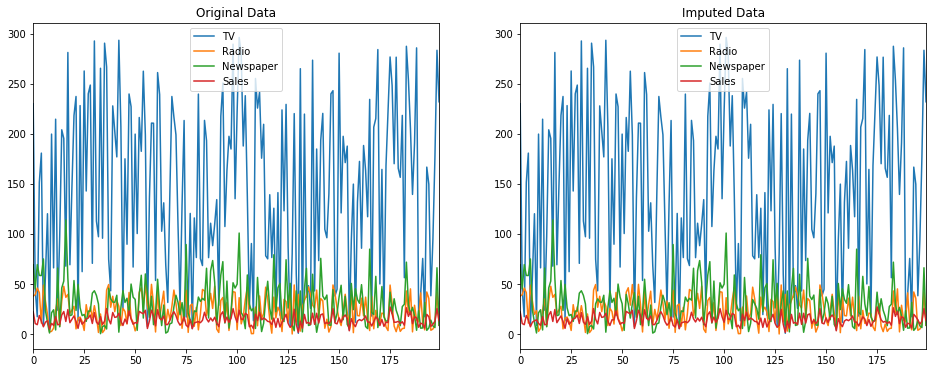

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
axes[0].set_title('Original Data');
df.plot(ax=axes[0])
axes[1].set_title('Imputed Data');
df_imp.plot(ax=axes[1])